In [44]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [45]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

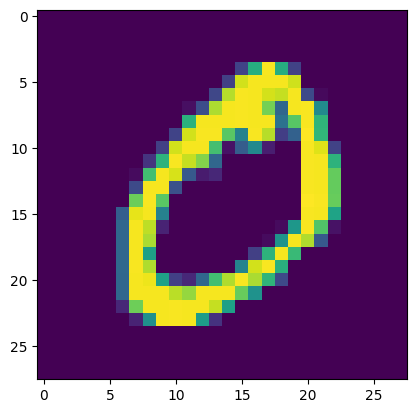

In [46]:
plt.imshow(X_train[1])

In [47]:
# converting all data points to lie in the range 0 - 1
# this is done to make the model converge faster and model learns faster

X_train = X_train/255
X_test = X_test/255

In [48]:
model = Sequential()

model.add(Flatten(input_shape=(28,28)))

# , input_dim=784 not added as we have already added Flatten layer. Flatten layers converts 28x28 matrix to 784x1 matrix which gives the input to the next layer
model.add(Dense(128, activation='relu'))
model.add(Dense(32, activation='relu'))

# activation function is softmax as we have 10 classes. We always use softamx for multiclass classification
model.add(Dense(10, activation='softmax'))

In [49]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_10 (Dense)            (None, 128)               100480    
                                                                 
 dense_11 (Dense)            (None, 32)                4128      
                                                                 
 dense_12 (Dense)            (None, 10)                330       
                                                                 
Total params: 104938 (409.91 KB)
Trainable params: 104938 (409.91 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [50]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [51]:
history = model.fit(X_train, y_train, epochs=25, validation_split=0.2)

Epoch 1/25
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2813 - accuracy: 0.9189 - val_loss: 0.1436 - val_accuracy: 0.9582
Epoch 2/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1164 - accuracy: 0.9649 - val_loss: 0.1114 - val_accuracy: 0.9659
Epoch 3/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0792 - accuracy: 0.9745 - val_loss: 0.1044 - val_accuracy: 0.9669
Epoch 4/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0603 - accuracy: 0.9806 - val_loss: 0.1055 - val_accuracy: 0.9679
Epoch 5/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0476 - accuracy: 0.9850 - val_loss: 0.1091 - val_accuracy: 0.9696
Epoch 6/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0363 - accuracy: 0.9886 - val_loss: 0.1147 - val_accuracy: 0.9701
Epoch 7/25
1500/1500 [==============================] - 4s 3ms/step - loss: 0.0298 - accuracy: 0.9909 - val_loss: 0.1029 - val_accuracy:

In [52]:
y_prob = model.predict(X_test)

313/313 [==============================] - 0s 1ms/step


In [53]:
y_pred = y_prob.argmax(axis=1)

In [54]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9741

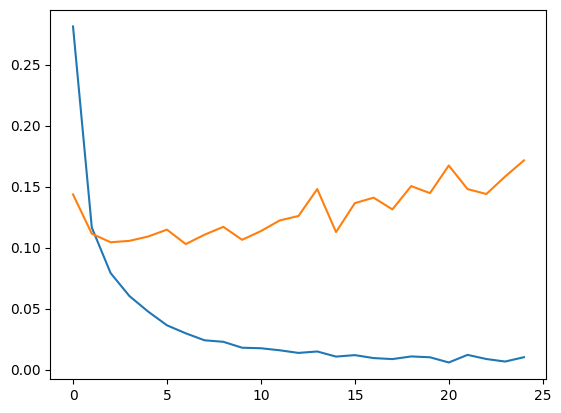

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

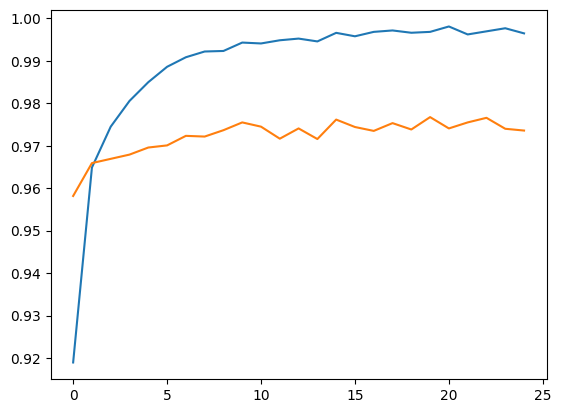

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])